In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
from sklearn import metrics

In [2]:
df = pd.read_csv("movie_metadata.csv") #data

In [3]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [4]:
df.shape 

(5043, 28)

In [5]:
pd.set_option('display.max_columns', None)

In [7]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [8]:
df.info() #checking data in detail

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [9]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [10]:
df["color"].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [11]:
df.describe() #statistical calculation

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [16]:
df.nunique()

color                           2
director_name                2398
num_critic_for_reviews        528
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        906
actor_2_name                 3032
actor_1_facebook_likes        878
gross                        4035
genres                        914
actor_1_name                 2097
movie_title                  4917
num_voted_users              4826
cast_total_facebook_likes    3978
actor_3_name                 3521
facenumber_in_poster           19
plot_keywords                4760
movie_imdb_link              4919
num_user_for_reviews          954
language                       47
country                        65
content_rating                 18
budget                        439
title_year                     91
actor_2_facebook_likes        917
imdb_score                     78
aspect_ratio                   22
movie_facebook_likes          876
dtype: int64

In [17]:
 df["language"].value_counts() #counting languages

English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Cantonese       11
Russian         11
Italian         11
Korean           8
Portuguese       8
Arabic           5
Hebrew           5
Swedish          5
Danish           5
Dutch            4
Polish           4
Norwegian        4
Persian          4
Thai             3
Chinese          3
Dari             2
None             2
Aboriginal       2
Indonesian       2
Zulu             2
Romanian         2
Icelandic        2
Mongolian        1
Panjabi          1
Maya             1
Kazakh           1
Telugu           1
Czech            1
Urdu             1
Slovenian        1
Hungarian        1
Dzongkha         1
Vietnamese       1
Filipino         1
Tamil            1
Kannada          1
Aramaic          1
Greek            1
Bosnian          1
Swahili          1
Name: language, dtype: int64

In [18]:
df["movie_title"] # movie title

0                                                 Avatar 
1               Pirates of the Caribbean: At World's End 
2                                                Spectre 
3                                  The Dark Knight Rises 
4       Star Wars: Episode VII - The Force Awakens    ...
                              ...                        
5038                             Signed Sealed Delivered 
5039                           The Following             
5040                                A Plague So Pleasant 
5041                                    Shanghai Calling 
5042                                   My Date with Drew 
Name: movie_title, Length: 5043, dtype: object

In [29]:
bw = df[(df.language == "Hindi")] # Hindi movie 

In [40]:
bw.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1056,Color,Deepa Mehta,34.0,110.0,375.0,59.0,Gulshan Grover,113.0,528972.0,Drama|Romance|War,Nandita Das,Earth,5639,371,Eric Peterson,0.0,friend|hindu|india|muslim|sikh,http://www.imdb.com/title/tt0150433/?ref_=fn_t...,55.0,Hindi,India,Unrated,NaN,1998.0,102.0,7.8,NaN,522
3075,Color,Karan Johar,20.0,193.0,160.0,860.0,John Abraham,8000.0,3275443.0,Drama,Shah Rukh Khan,Kabhi Alvida Naa Kehna,13998,10822,Preity Zinta,2.0,extramarital affair|fashion magazine editor|ma...,http://www.imdb.com/title/tt0449999/?ref_=fn_t...,264.0,Hindi,India,R,700000000.0,2006.0,1000.0,6.0,2.35,659
3085,Color,Sajid Khan,10.0,144.0,0.0,119.0,Boman Irani,564.0,1165104.0,Comedy,Arjun Rampal,Housefull,8598,1121,Riteish Deshmukh,5.0,bad luck|casino|lie|mix up|stutter,http://www.imdb.com/title/tt1573072/?ref_=fn_t...,43.0,Hindi,India,NaN,NaN,2010.0,154.0,5.3,NaN,250
3208,Color,Rakesh Roshan,20.0,168.0,53.0,45.0,Rekha,307.0,NaN,Action|Adventure|Romance|Sci-Fi,Naseeruddin Shah,Krrish,12411,616,Sharat Saxena,0.0,breaking the fourth wall|breaking the fourth w...,http://www.imdb.com/title/tt0432637/?ref_=fn_t...,110.0,Hindi,India,Not Rated,10000000.0,2006.0,200.0,6.3,2.35,533
3276,Color,Yash Chopra,50.0,176.0,147.0,1000.0,Katrina Kaif,8000.0,3047539.0,Drama|Romance,Shah Rukh Khan,Jab Tak Hai Jaan,42296,13762,Vic Waghorn,4.0,accident|army|bomb|indian army|love,http://www.imdb.com/title/tt2176013/?ref_=fn_t...,286.0,Hindi,India,Not Rated,7217600.0,2012.0,3000.0,6.9,2.35,12000


In [42]:
score = bw.imdb_score[bw.imdb_score >=7] #imdb score greater than 7
title = bw.movie_title[bw.imdb_score >=7] #title name where imdb score greater than 7
genre=bw.genres[bw.imdb_score>=7]

In [44]:
bollywd_ratings = pd.concat([score,title,genre],axis=1)

In [45]:
 bollywd_ratings

,imdb_score,movie_title,genres
1056,7.8,Earth,Drama|Romance|War
3344,8.0,My Name Is Khan,Adventure|Drama|Thriller
3348,7.3,Namastey London,Comedy|Drama|Romance
3510,7.9,Veer-Zaara,Drama|Musical|Romance
3685,8.4,Rang De Basanti,Comedy|Drama|History|Romance
3789,7.4,"Gandhi, My Father",Biography|Drama|History
3870,8.5,Airlift,Action|Drama|History|Thriller|War
3877,7.2,Paa,Comedy|Drama
4088,7.8,Water,Drama|Romance
4160,8.2,Lage Raho Munna Bhai,Comedy|Drama|Romance


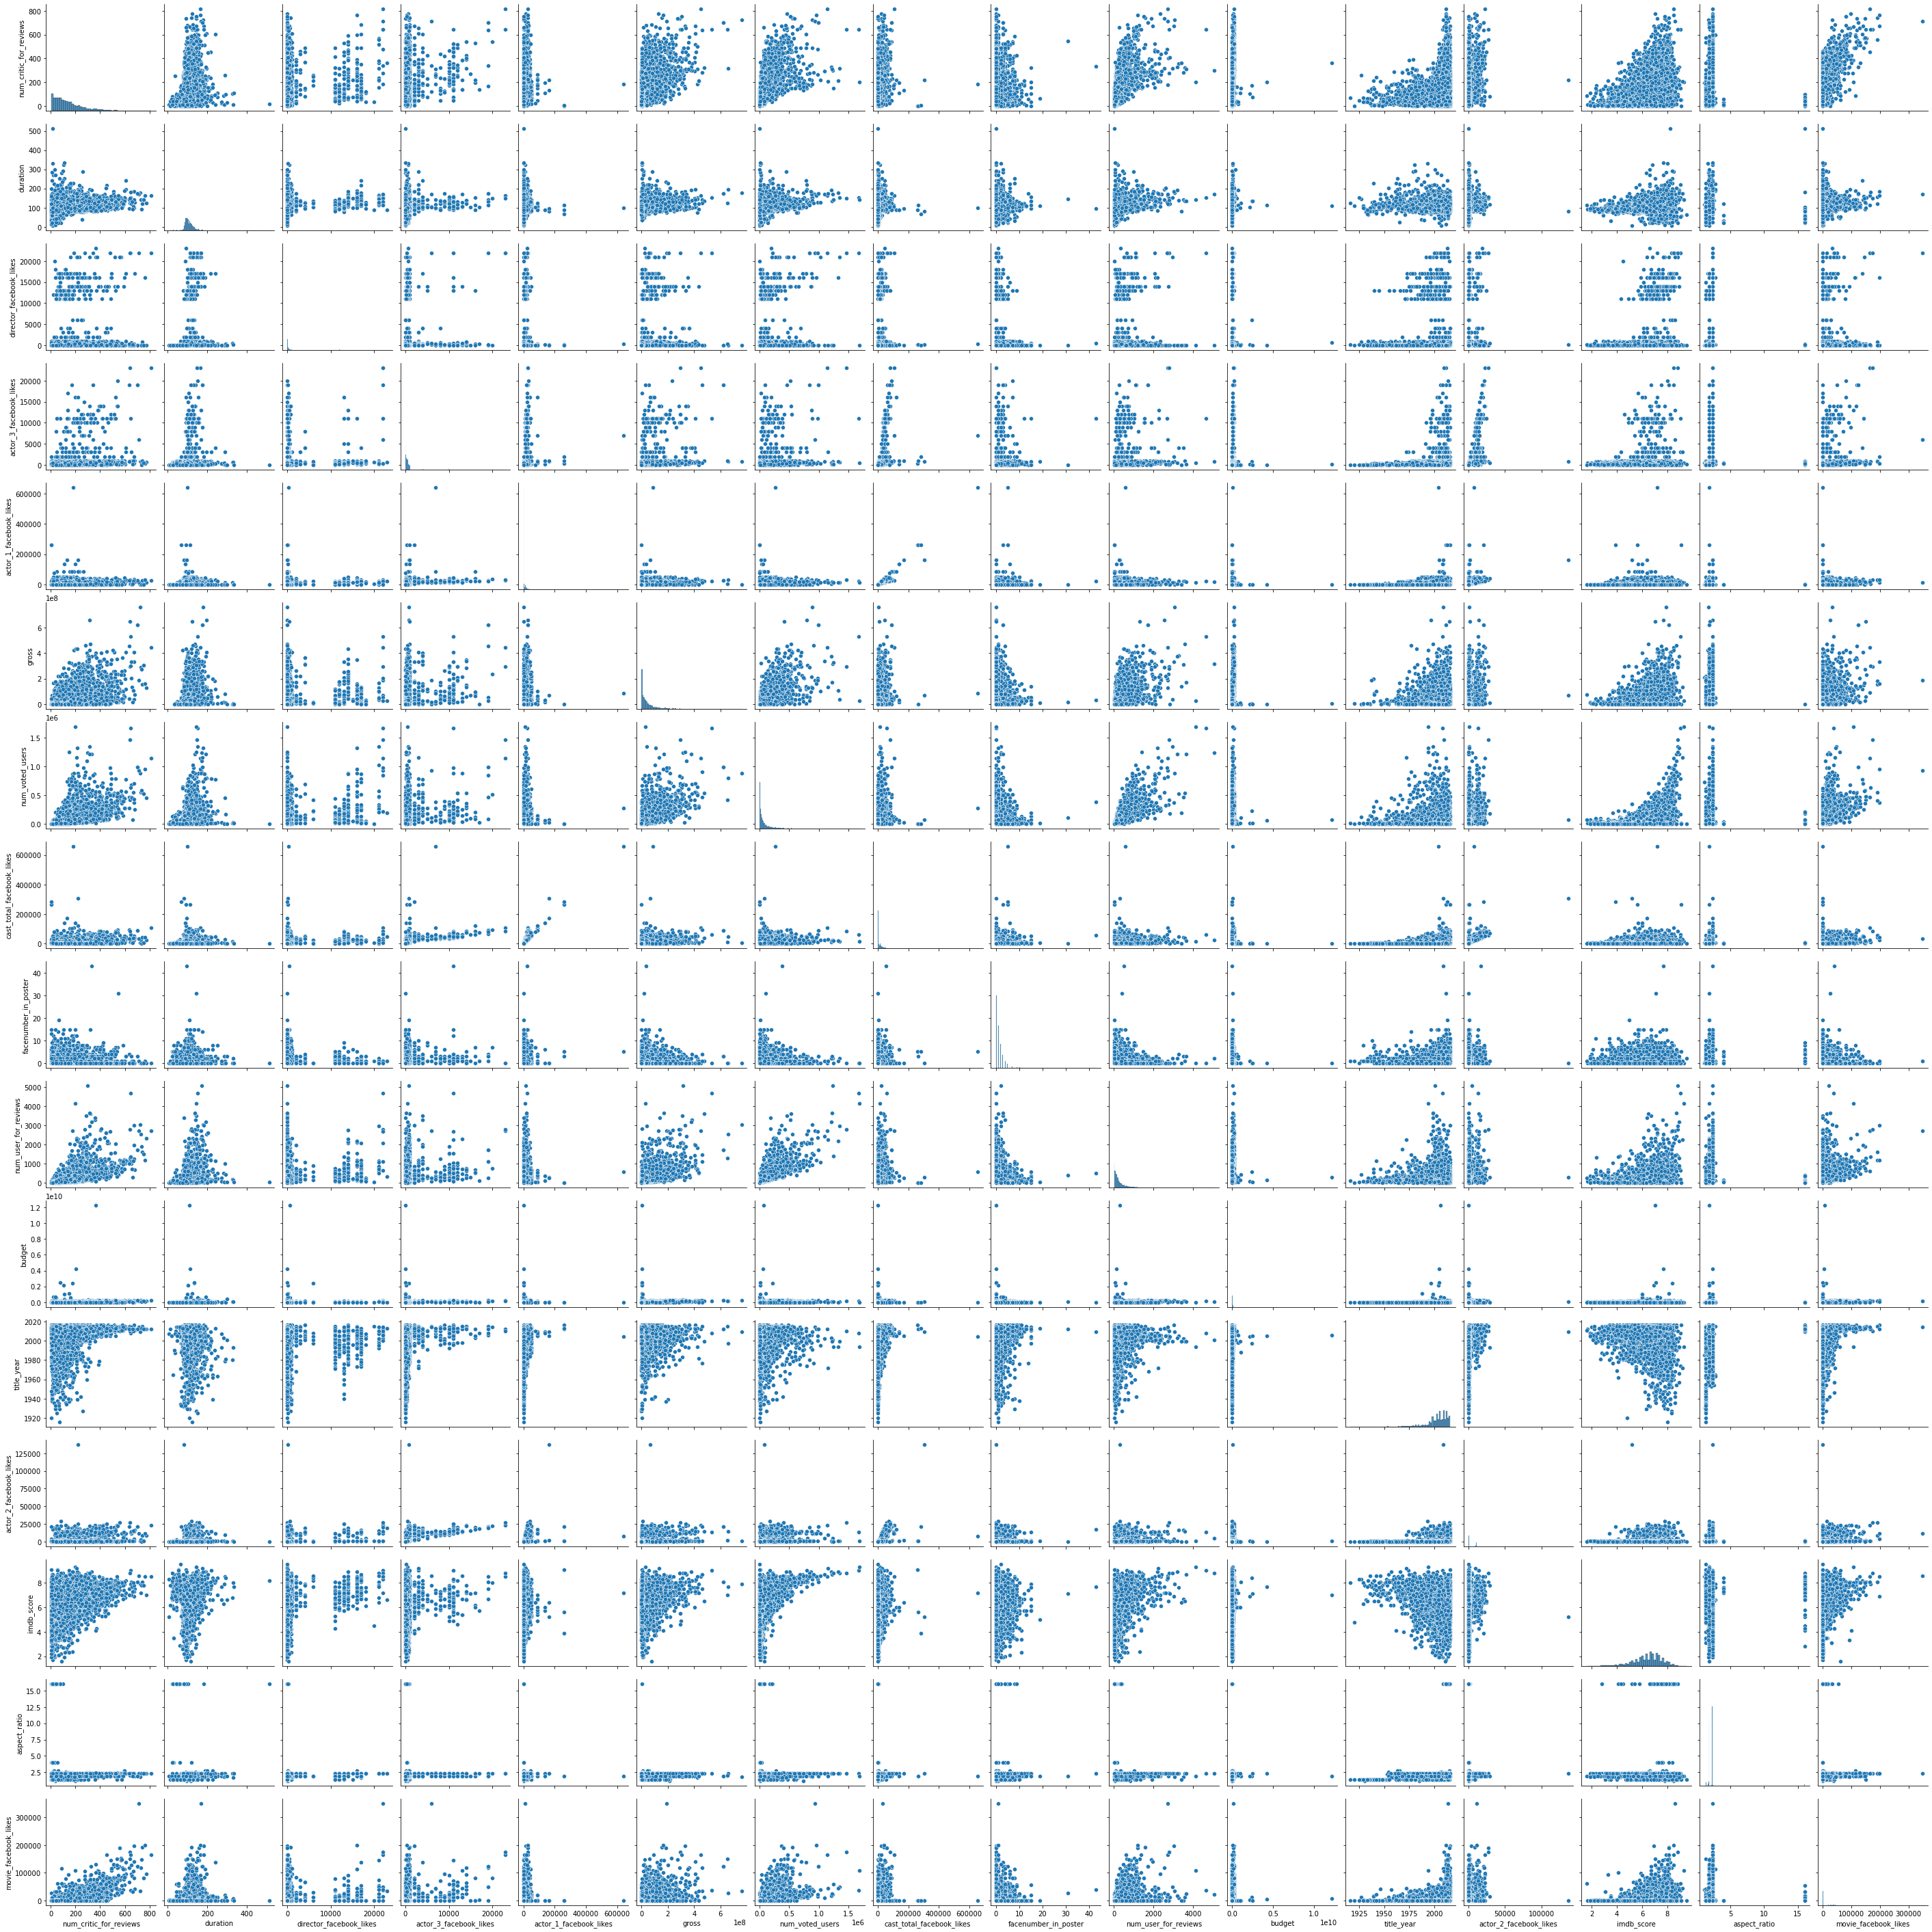

In [46]:
sns.pairplot(df)

In [65]:
top_ratings = df["imdb_score"].value_counts(ascending=False).head(10) 

<AxesSubplot:ylabel='imdb_score'>

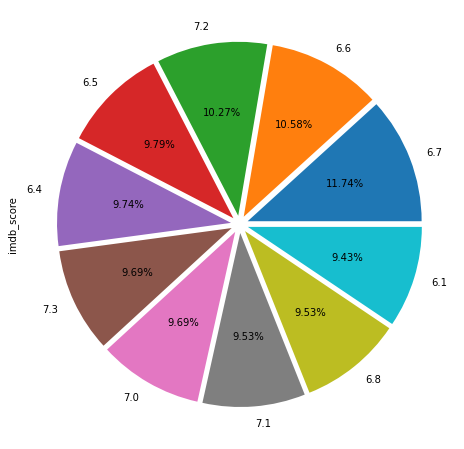

In [75]:
plt.figure(figsize=(10,8))
explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
top_ratings.plot(kind="pie",explode=explode,autopct="%0.2f%%")
# Around 11.74 percent of the data has a imdb score which is 6.7

C:\Users\UMAIR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='imdb_score', ylabel='Density'>

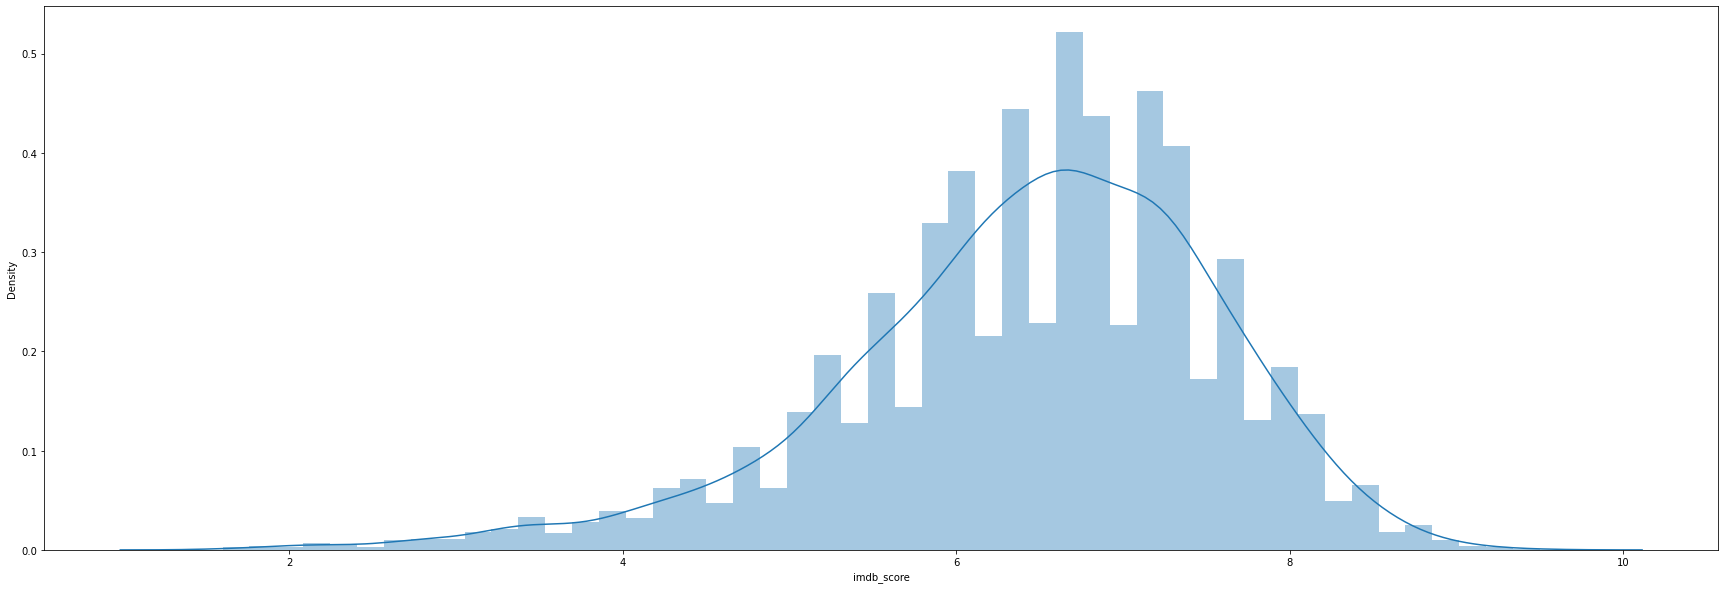

In [77]:
plt.figure(figsize=(30,10))
sns.distplot(df['imdb_score'])

C:\Users\UMAIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'English'),
 Text(1, 0, 'French'),
 Text(2, 0, 'Spanish'),
 Text(3, 0, 'Hindi'),
 Text(4, 0, 'Mandarin'),
 Text(5, 0, 'German'),
 Text(6, 0, 'Japanese'),
 Text(7, 0, 'Russian'),
 Text(8, 0, 'Cantonese'),
 Text(9, 0, 'Italian'),
 Text(10, 0, 'Korean'),
 Text(11, 0, 'Portuguese'),
 Text(12, 0, 'Arabic'),
 Text(13, 0, 'Hebrew'),
 Text(14, 0, 'Swedish'),
 Text(15, 0, 'Danish'),
 Text(16, 0, 'Norwegian'),
 Text(17, 0, 'Dutch'),
 Text(18, 0, 'Polish'),
 Text(19, 0, 'Persian')]

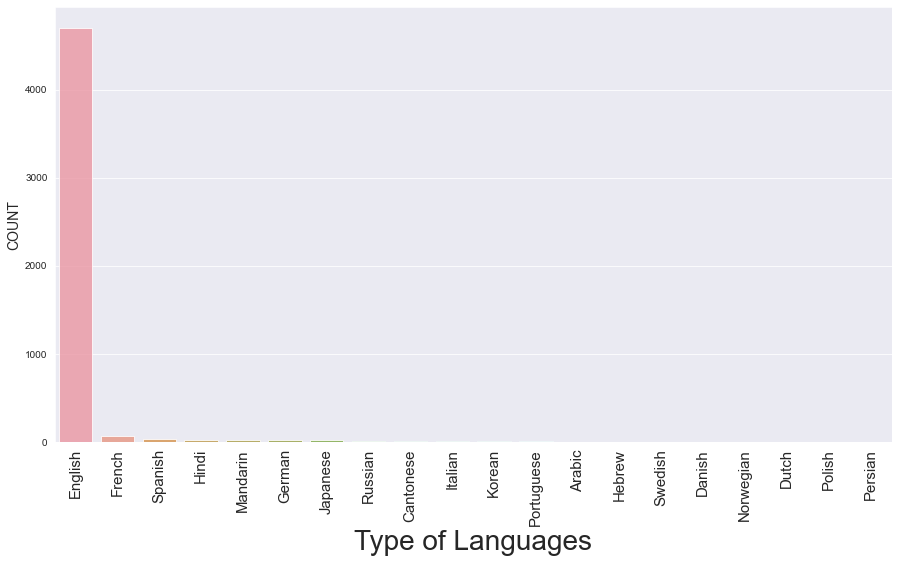

In [89]:
sns.set_style("darkgrid")
lang=df['language'].value_counts().head(20).sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(lang.index, lang.values, alpha=0.8)
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('Type of Languages', fontsize=28)
temp.set_xticklabels(rotation=90,labels=lang.index,fontsize=15)
#language visualization

C:\Users\UMAIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Steven Spielberg'),
 Text(1, 0, 'Woody Allen'),
 Text(2, 0, 'Martin Scorsese'),
 Text(3, 0, 'Clint Eastwood'),
 Text(4, 0, 'Ridley Scott'),
 Text(5, 0, 'Tim Burton'),
 Text(6, 0, 'Spike Lee'),
 Text(7, 0, 'Steven Soderbergh'),
 Text(8, 0, 'Renny Harlin'),
 Text(9, 0, 'Oliver Stone'),
 Text(10, 0, 'Barry Levinson'),
 Text(11, 0, 'Robert Zemeckis'),
 Text(12, 0, 'Michael Bay'),
 Text(13, 0, 'Ron Howard'),
 Text(14, 0, 'Robert Rodriguez'),
 Text(15, 0, 'Joel Schumacher'),
 Text(16, 0, 'Sam Raimi'),
 Text(17, 0, 'John Carpenter'),
 Text(18, 0, 'Shawn Levy'),
 Text(19, 0, 'Tony Scott')]

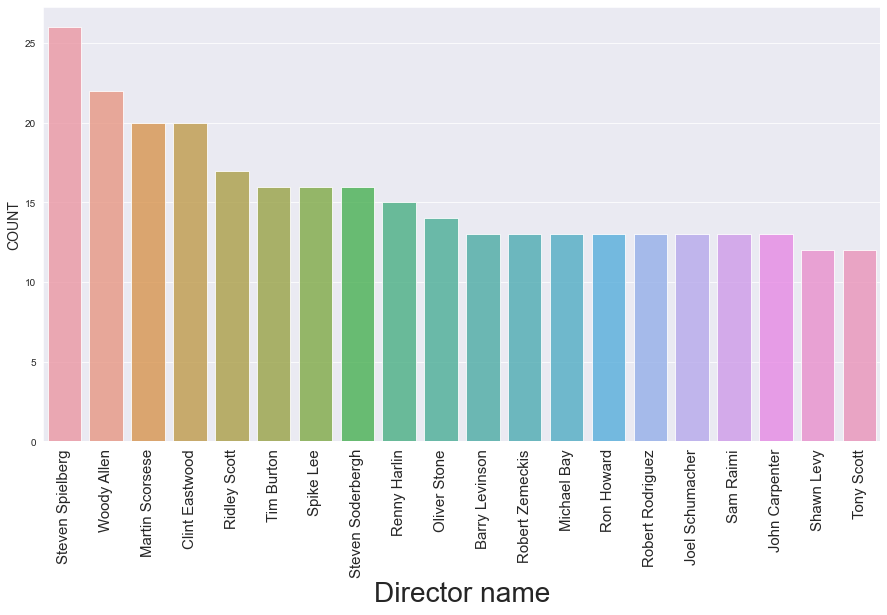

In [90]:
sns.set_style("darkgrid")
lang=df['director_name'].value_counts().head(20).sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(lang.index, lang.values, alpha=0.8)
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('Director name', fontsize=28)
temp.set_xticklabels(rotation=90,labels=lang.index,fontsize=15)
#Steven Spielberg count is higher than others

C:\Users\UMAIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 [Text(0, 0, 'USA'),
  Text(1, 0, 'UK'),
  Text(2, 0, 'New Zealand'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Australia'),
  Text(5, 0, 'Belgium'),
  Text(6, 0, 'Japan'),
  Text(7, 0, 'Germany'),
  Text(8, 0, 'China'),
  Text(9, 0, 'France'),
  Text(10, 0, 'New Line'),
  Text(11, 0, 'Mexico'),
  Text(12, 0, 'Spain'),
  Text(13, 0, 'Hong Kong'),
  Text(14, 0, 'Czech Republic'),
  Text(15, 0, 'India'),
  Text(16, 0, 'Soviet Union'),
  Text(17, 0, 'South Korea'),
  Text(18, 0, 'Peru'),
  Text(19, 0, 'Italy'),
  Text(20, 0, 'Russia'),
  Text(21, 0, 'Aruba'),
  Text(22, 0, 'Denmark'),
  Text(23, 0, 'Libya'),
  Text(24, 0, 'Ireland'),
  Text(25, 0, 'South Africa'),
  Text(26, 0, 'Iceland'),
  Text(27, 0, 

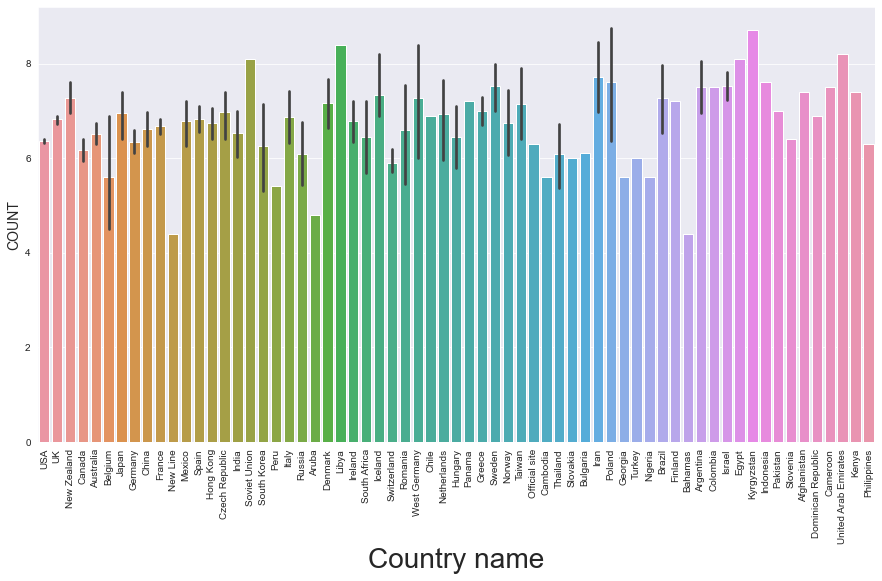

In [94]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,8))
temp =sns.barplot(df["country"], y=df["imdb_score"])
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('Country name', fontsize=28)
plt.xticks(rotation=90)
#countries and imdb scores

C:\Users\UMAIR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'PG-13'),
  Text(1, 0, 'PG'),
  Text(2, 0, 'G'),
  Text(3, 0, 'R'),
  Text(4, 0, 'TV-14'),
  Text(5, 0, 'TV-PG'),
  Text(6, 0, 'TV-MA'),
  Text(7, 0, 'TV-G'),
  Text(8, 0, 'Not Rated'),
  Text(9, 0, 'Unrated'),
  Text(10, 0, 'Approved'),
  Text(11, 0, 'TV-Y'),
  Text(12, 0, 'NC-17'),
  Text(13, 0, 'X'),
  Text(14, 0, 'TV-Y7'),
  Text(15, 0, 'GP'),
  Text(16, 0, 'Passed'),
  Text(17, 0, 'M')])

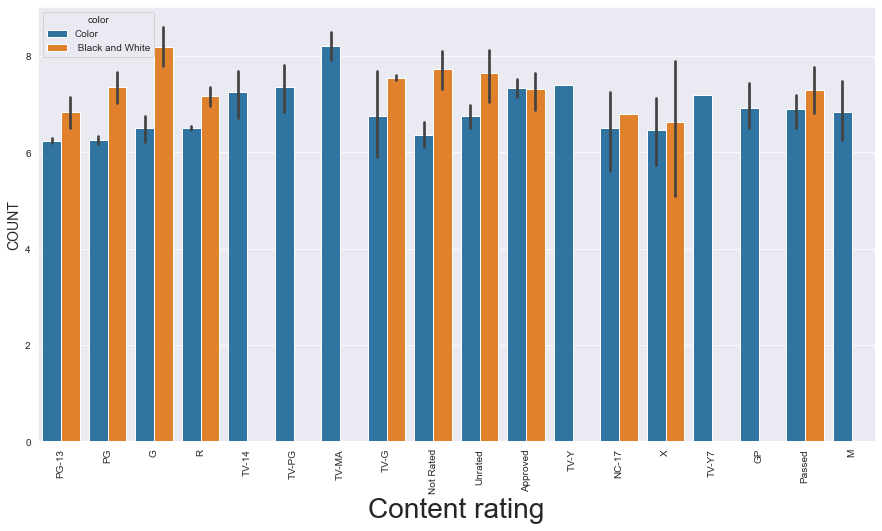

In [96]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,8))
temp =sns.barplot(df["content_rating"], y=df["imdb_score"],hue=df["color"])
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('Content rating', fontsize=28)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'PG-13'),
  Text(1, 0, 'PG'),
  Text(2, 0, 'G'),
  Text(3, 0, 'R'),
  Text(4, 0, 'TV-14'),
  Text(5, 0, 'TV-PG'),
  Text(6, 0, 'TV-MA'),
  Text(7, 0, 'TV-G'),
  Text(8, 0, 'Not Rated'),
  Text(9, 0, 'Unrated'),
  Text(10, 0, 'Approved'),
  Text(11, 0, 'TV-Y'),
  Text(12, 0, 'NC-17'),
  Text(13, 0, 'X'),
  Text(14, 0, 'TV-Y7'),
  Text(15, 0, 'GP'),
  Text(16, 0, 'Passed'),
  Text(17, 0, 'M')])

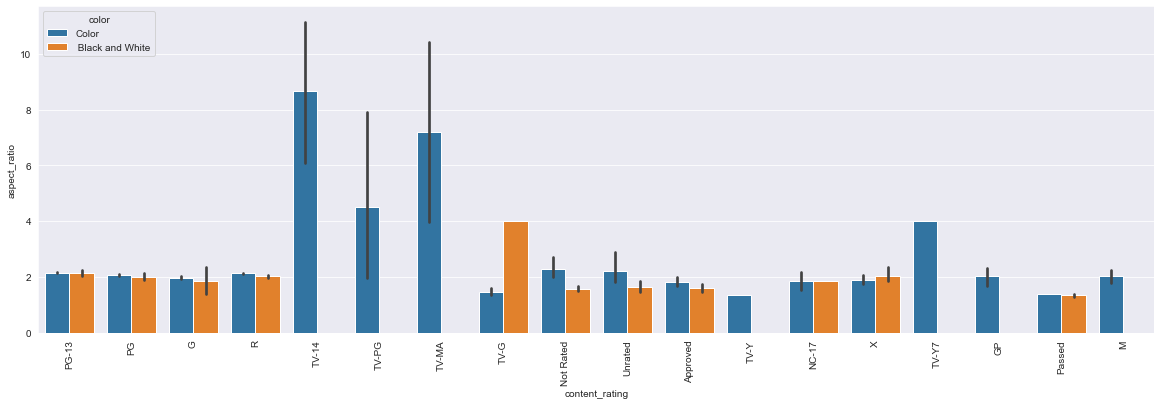

In [97]:
plt.figure(figsize=(20, 6))
sns.barplot(x='content_rating',y='aspect_ratio',hue='color',data=df);
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '1.18'),
  Text(1, 0, '1.2'),
  Text(2, 0, '1.33'),
  Text(3, 0, '1.37'),
  Text(4, 0, '1.44'),
  Text(5, 0, '1.5'),
  Text(6, 0, '1.66'),
  Text(7, 0, '1.75'),
  Text(8, 0, '1.77'),
  Text(9, 0, '1.78'),
  Text(10, 0, '1.85'),
  Text(11, 0, '1.89'),
  Text(12, 0, '2.0'),
  Text(13, 0, '2.2'),
  Text(14, 0, '2.24'),
  Text(15, 0, '2.35'),
  Text(16, 0, '2.39'),
  Text(17, 0, '2.4'),
  Text(18, 0, '2.55'),
  Text(19, 0, '2.76'),
  Text(20, 0, '4.0'),
  Text(21, 0, '16.0')])

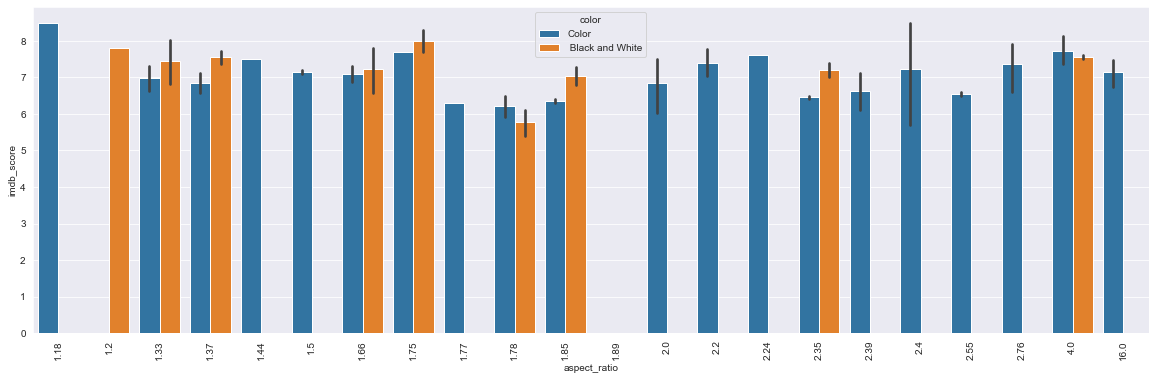

In [98]:
plt.figure(figsize=(20, 6))
sns.barplot(x='aspect_ratio',y='imdb_score',hue='color',data=df);
plt.xticks(rotation=90)

In [99]:
df=df.dropna()

In [100]:
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [102]:
df=df.drop(columns=['movie_imdb_link','color','movie_title','facenumber_in_poster', 'plot_keywords',
                    'actor_3_name','movie_imdb_link','aspect_ratio','language'])

In [53]:
from sklearn.preprocessing import LabelEncoder

In [104]:
category = ['content_rating','director_name','genres','actor_1_name','actor_2_name','country']
encoder = LabelEncoder()
for c in category:
    df[c] = encoder.fit_transform(df[c])
    
# OneHot Encoding

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              3756 non-null   int32  
 1   num_critic_for_reviews     3756 non-null   float64
 2   duration                   3756 non-null   float64
 3   director_facebook_likes    3756 non-null   float64
 4   actor_3_facebook_likes     3756 non-null   float64
 5   actor_2_name               3756 non-null   int32  
 6   actor_1_facebook_likes     3756 non-null   float64
 7   gross                      3756 non-null   float64
 8   genres                     3756 non-null   int32  
 9   actor_1_name               3756 non-null   int32  
 10  num_voted_users            3756 non-null   int64  
 11  cast_total_facebook_likes  3756 non-null   int64  
 12  num_user_for_reviews       3756 non-null   float64
 13  country                    3756 non-null   int32

In [56]:
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].replace("4+",4)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  float64
 2   Gender                      550068 non-null  int32  
 3   Age                         550068 non-null  int32  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int32  
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int32(3), int64(5), object(1)
memory usage: 39.9+ MB


C:\Users\UMAIR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\UMAIR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\UMAIR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

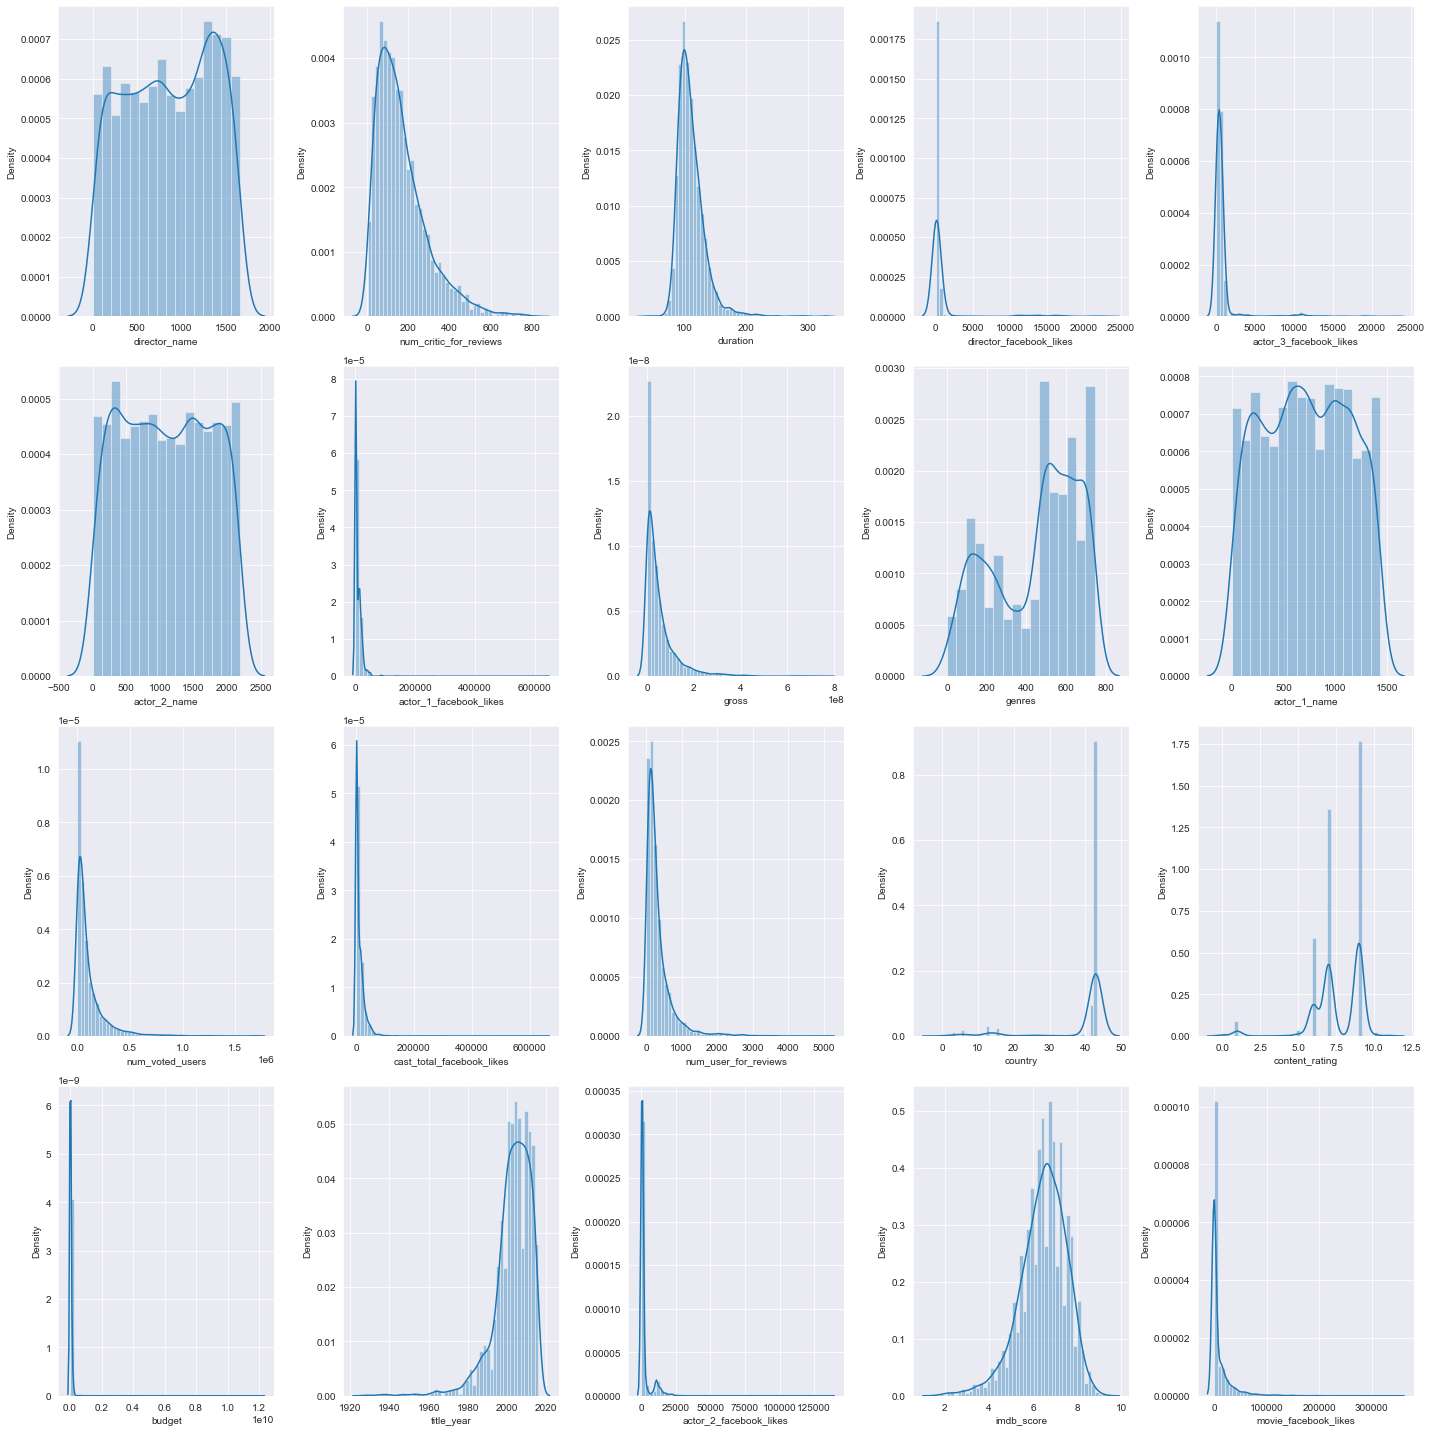

In [107]:
rows=4
cols=5
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,20))
col=df.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]],ax=ax[i][j])
        index=index+1
        
plt.tight_layout()

In [109]:
skewed = ['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews',
       'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes']

In [110]:
for i in skewed:
    df[i]=np.log(df[i]+1)

C:\Users\UMAIR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\UMAIR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\UMAIR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

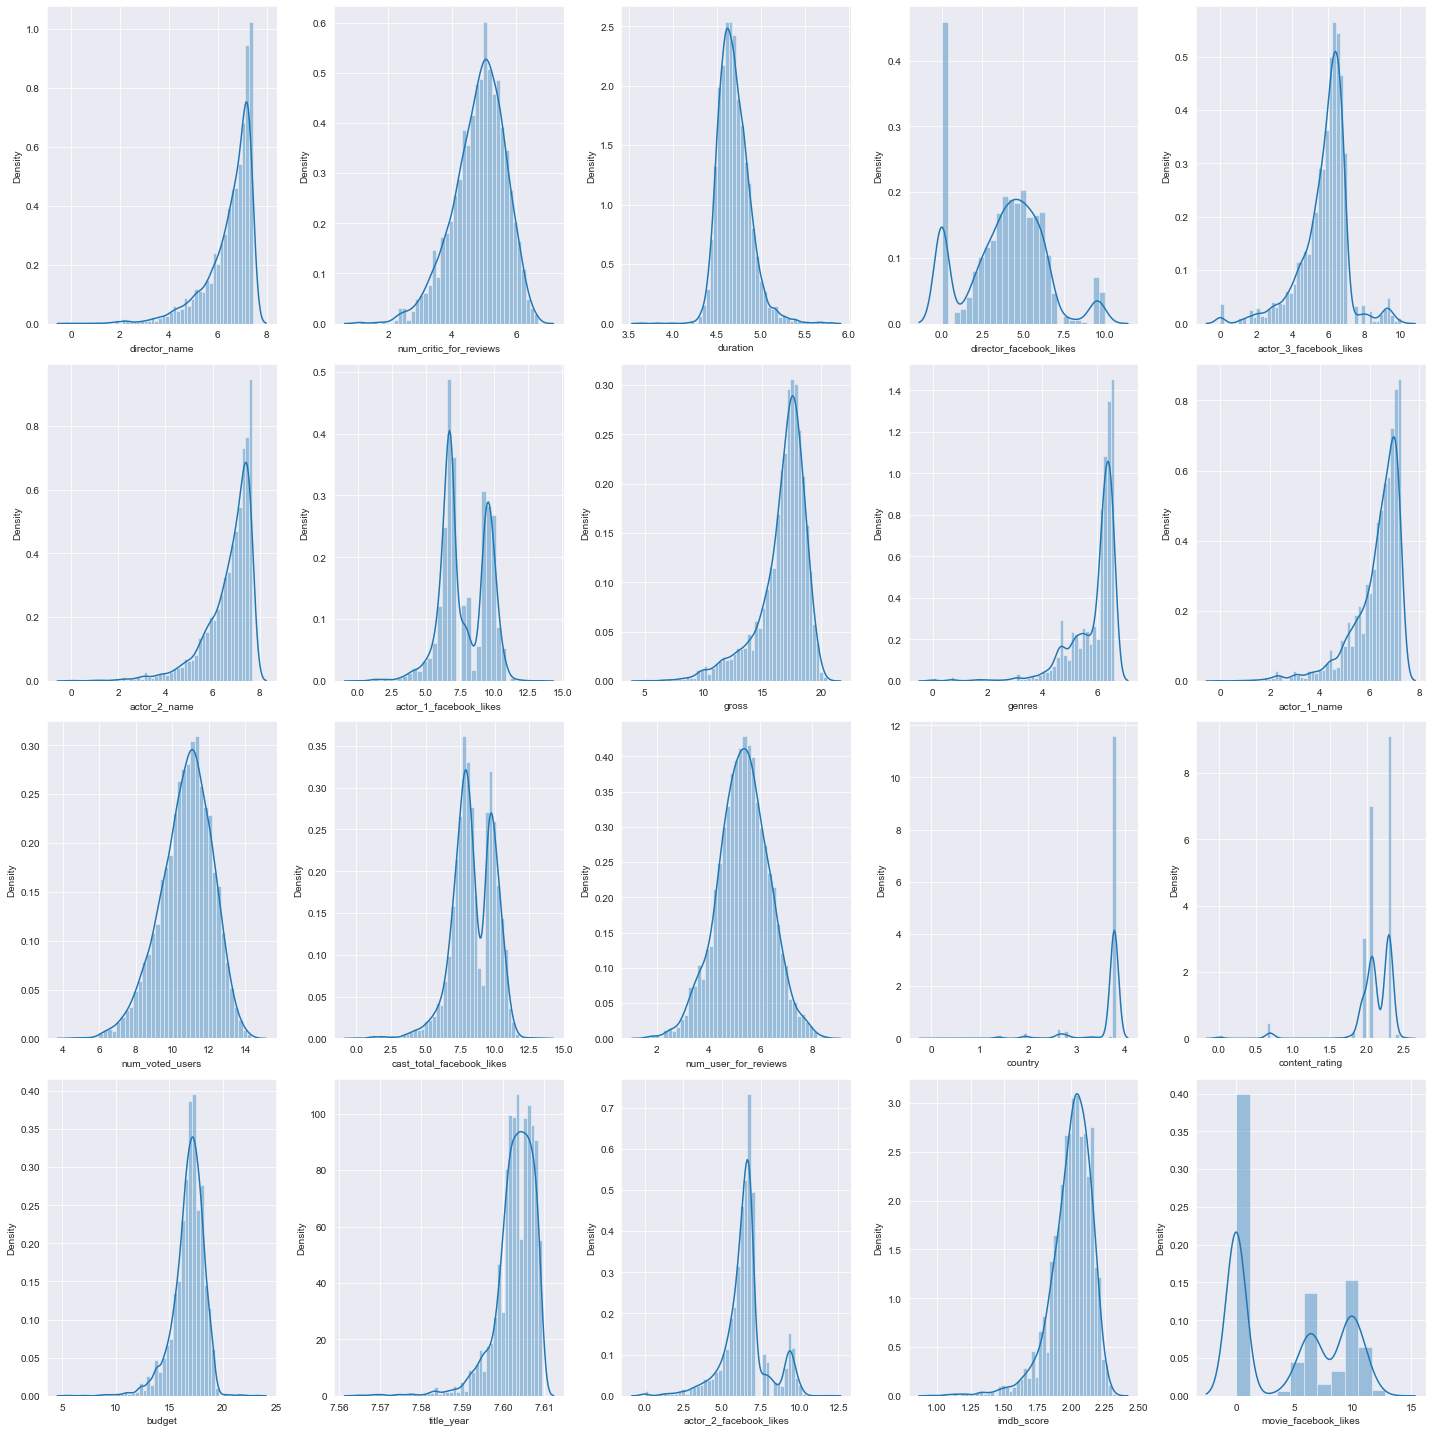

In [111]:
rows=4
cols=5
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,20))
col=df.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]],ax=ax[i][j])
        index=index+1
        
plt.tight_layout()

In [113]:
X=df.drop(labels=['imdb_score'],axis=1)
y=df['imdb_score']
X.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_facebook_likes
0,6.431331,6.584791,5.187386,0.000000,6.752270,6.910751,6.908755,20.449494,4.521789,5.247024,13.694704,8.483636,8.024535,3.78419,2.079442,19.283571,7.605890,6.842683,10.404293
1,6.289716,5.713733,5.135798,6.335054,6.908755,7.373374,10.596660,19.550159,4.454347,6.533789,13.063082,10.786242,7.122060,3.78419,2.079442,19.519293,7.604894,8.517393,0.000000
2,7.241366,6.401917,5.003946,0.000000,5.087596,7.493317,9.305741,19.114199,4.682131,5.556828,12.527681,9.367430,6.902743,3.76120,2.079442,19.316769,7.608871,5.976351,11.350418
3,5.529429,6.701960,5.105945,9.998843,10.043293,5.945421,10.203629,19.920595,5.497168,7.201171,13.950337,11.578339,7.901748,3.78419,2.079442,19.336971,7.607381,10.043293,12.007628
5,4.143135,6.137727,4.890349,6.165418,6.274762,7.516433,6.463029,18.106774,4.663439,5.780744,12.265308,7.535830,6.605298,3.78419,2.079442,19.390323,7.607381,6.450470,10.085851


In [115]:
y

0       2.186051
1       2.091864
2       2.054124
3       2.251292
5       2.028148
          ...   
5026    2.066863
5027    2.140066
5033    2.079442
5035    2.066863
5042    2.028148
Name: imdb_score, Length: 3756, dtype: float64

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [183]:
linear = LinearRegression()
linear.fit(X_train,y_train)
train_pred = linear.predict(X_train)
test_pred = linear.predict(X_test)

In [184]:
score_train = r2_score(y_train,train_pred)
score_test =r2_score(y_test,test_pred)

RMSE_train=np.sqrt(mean_squared_error(y_train,train_pred))
RMSE_test =np.sqrt(mean_squared_error(y_test,test_pred))

print('Train_root_mean_squared_error: ',RMSE_train)
print('Test_root_mean_squared_error: ',RMSE_test)

print("-"*40)

print('r2_score_train: ',score_train)
print('r2_score_test: ',score_test)

#calculating error rate and finding the accuracy
error = abs(test_pred - y_test)
error_perc = 100 * (error / y_test)
accuracy ="Accuracy " + str(np.round(100 - error_perc.mean(),2)) + " %"
accuracy

Train_root_mean_squared_error:  0.12041595568987488
Test_root_mean_squared_error:  0.1186110530757113
----------------------------------------
r2_score_train:  0.408009505508521
r2_score_test:  0.40210015522318754


'Accuracy 95.5 %'

### Decision Tree Regressor

In [185]:
DT = DecisionTreeRegressor(max_depth=9)
DT.fit(X_train,y_train)
train_pred = DT.predict(X_train)
test_pred = DT.predict(X_test)

In [186]:
score_train = r2_score(y_train,train_pred)
score_test =r2_score(y_test,test_pred)

RMSE_train=np.sqrt(mean_squared_error(y_train,train_pred))
RMSE_test =np.sqrt(mean_squared_error(y_test,test_pred))

print('Train_root_mean_squared_error: ',RMSE_train)
print('Test_root_mean_squared_error: ',RMSE_test)

print("-"*40)

print('r2_score_train: ',score_train)
print('r2_score_test: ',score_test)

#calculating error rate and finding the accuracy
error = abs(test_pred - y_test)
error_perc = 100 * (error / y_test)
accuracy ="Accuracy " + str(np.round(100 - error_perc.mean(),2)) + " %"
accuracy

Train_root_mean_squared_error:  0.08302711763715252
Test_root_mean_squared_error:  0.1277394022788263
----------------------------------------
r2_score_train:  0.7185595074222233
r2_score_test:  0.30652968296066607


'Accuracy 95.41 %'

## Random Forest Regressor

In [187]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
train_pred = RF.predict(X_train)
test_pred = RF.predict(X_test)

In [188]:
score_train = r2_score(y_train,train_pred)
score_test =r2_score(y_test,test_pred)

RMSE_train=np.sqrt(mean_squared_error(y_train,train_pred))
RMSE_test =np.sqrt(mean_squared_error(y_test,test_pred))

print('Train_root_mean_squared_error: ',RMSE_train)
print('Test_root_mean_squared_error: ',RMSE_test)

print("-"*40)

print('r2_score_train: ',score_train)
print('r2_score_test: ',score_test)

#calculating error rate and finding the accuracy
error = abs(test_pred - y_test)
error_perc = 100 * (error / y_test)
accuracy ="Accuracy " + str(np.round(100 - error_perc.mean(),2)) + " %"
accuracy

Train_root_mean_squared_error:  0.041618463524829834
Test_root_mean_squared_error:  0.10065466758939172
----------------------------------------
r2_score_train:  0.929283827685804
r2_score_test:  0.5694278307879658


'Accuracy 96.29 %'

## K-Nearest Neighbours

In [189]:
KNN = KNeighborsRegressor()
KNN.fit(X_train,y_train)
train_pred = KNN.predict(X_train)
test_pred = KNN.predict(X_test)

In [190]:
score_train = r2_score(y_train,train_pred)
score_test =r2_score(y_test,test_pred)

RMSE_train=np.sqrt(mean_squared_error(y_train,train_pred))
RMSE_test =np.sqrt(mean_squared_error(y_test,test_pred))

print('Train_root_mean_squared_error: ',RMSE_train)
print('Test_root_mean_squared_error: ',RMSE_test)

print("-"*40)

print('r2_score_train: ',score_train)
print('r2_score_test: ',score_test)

#calculating error rate and finding the accuracy
error = abs(test_pred - y_test)
error_perc = 100 * (error / y_test)
accuracy ="Accuracy " + str(np.round(100 - error_perc.mean(),2)) + " %"
accuracy

Train_root_mean_squared_error:  0.10856954037953365
Test_root_mean_squared_error:  0.13173731630991498
----------------------------------------
r2_score_train:  0.518758958219276
r2_score_test:  0.2624427420400328


'Accuracy 95.04 %'

In [191]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import GradientBoostingRegressor

## Lasso Regression

In [192]:
Lasso = LassoCV(cv=10)
Lasso.fit(X_train,y_train)
train_pred = Lasso.predict(X_train)
test_pred = Lasso.predict(X_test)

In [193]:
score_train = r2_score(y_train,train_pred)
score_test =r2_score(y_test,test_pred)

RMSE_train=np.sqrt(mean_squared_error(y_train,train_pred))
RMSE_test =np.sqrt(mean_squared_error(y_test,test_pred))

print('Train_root_mean_squared_error: ',RMSE_train)
print('Test_root_mean_squared_error: ',RMSE_test)

print("-"*40)

print('r2_score_train: ',score_train)
print('r2_score_test: ',score_test)

#calculating error rate and finding the accuracy
error = abs(test_pred - y_test)
error_perc = 100 * (error / y_test)
accuracy ="Accuracy " + str(np.round(100 - error_perc.mean(),2)) + " %"
accuracy

Train_root_mean_squared_error:  0.12196766732315872
Test_root_mean_squared_error:  0.11809803934941586
----------------------------------------
r2_score_train:  0.39265411206730205
r2_score_test:  0.407261014804443


'Accuracy 95.53 %'

## Ridge Regression

In [194]:
Ridge = RidgeCV(cv=10)
Ridge.fit(X_train,y_train)
train_pred = Ridge.predict(X_train)
test_pred = Ridge.predict(X_test)

In [195]:
score_train = r2_score(y_train,train_pred)
score_test =r2_score(y_test,test_pred)

RMSE_train=np.sqrt(mean_squared_error(y_train,train_pred))
RMSE_test =np.sqrt(mean_squared_error(y_test,test_pred))

print('Train_root_mean_squared_error: ',RMSE_train)
print('Test_root_mean_squared_error: ',RMSE_test)

print("-"*40)

print('r2_score_train: ',score_train)
print('r2_score_test: ',score_test)

#calculating error rate and finding the accuracy
error = abs(test_pred - y_test)
error_perc = 100 * (error / y_test)
accuracy ="Accuracy " + str(np.round(100 - error_perc.mean(),2)) + " %"
accuracy

Train_root_mean_squared_error:  0.12123661279697663
Test_root_mean_squared_error:  0.1178438602107991
----------------------------------------
r2_score_train:  0.399912959087671
r2_score_test:  0.4098097404701735


'Accuracy 95.53 %'

In [196]:
EN = ElasticNetCV(cv=10)
EN.fit(X_train,y_train)
train_pred = EN.predict(X_train)
test_pred = EN.predict(X_test)

In [197]:
score_train = r2_score(y_train,train_pred)
score_test =r2_score(y_test,test_pred)

RMSE_train=np.sqrt(mean_squared_error(y_train,train_pred))
RMSE_test =np.sqrt(mean_squared_error(y_test,test_pred))

print('Train_root_mean_squared_error: ',RMSE_train)
print('Test_root_mean_squared_error: ',RMSE_test)

print("-"*40)

print('r2_score_train: ',score_train)
print('r2_score_test: ',score_test)

#calculating error rate and finding the accuracy
error = abs(test_pred - y_test)
error_perc = 100 * (error / y_test)
accuracy ="Accuracy " + str(np.round(100 - error_perc.mean(),2)) + " %"
accuracy

Train_root_mean_squared_error:  0.1219689940230489
Test_root_mean_squared_error:  0.11810830677152077
----------------------------------------
r2_score_train:  0.3926408992196213
r2_score_test:  0.4071579450846382


'Accuracy 95.53 %'

### XG-Boost Regressor

In [198]:
XGB =xgb.XGBRegressor()
XGB.fit(X_train,y_train)
train_pred = XGB.predict(X_train)
test_pred = XGB.predict(X_test)

In [199]:
score_train = r2_score(y_train,train_pred)
score_test =r2_score(y_test,test_pred)

RMSE_train=np.sqrt(mean_squared_error(y_train,train_pred))
RMSE_test =np.sqrt(mean_squared_error(y_test,test_pred))

print('Train_root_mean_squared_error: ',RMSE_train)
print('Test_root_mean_squared_error: ',RMSE_test)

print("-"*40)

print('r2_score_train: ',score_train)
print('r2_score_test: ',score_test)

#calculating error rate and finding the accuracy
error = abs(test_pred - y_test)
error_perc = 100 * (error / y_test)
accuracy ="Accuracy " + str(np.round(100 - error_perc.mean(),2)) + " %"
accuracy

Train_root_mean_squared_error:  0.016453210384851504
Test_root_mean_squared_error:  0.09549969503973747
----------------------------------------
r2_score_train:  0.9889478196861716
r2_score_test:  0.612401500913349


'Accuracy 96.49 %'

In [200]:
#Our model is performing well with XGBOOSt